# Microphone amplifier analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

This circuit uses a variable resistor to adjust the base voltage and the base current. To simplify the analysis, we used Thevenin’s theorem. Both Thevenin’s voltage and the resistor depend on the variable resistor.

[2911.50442478]


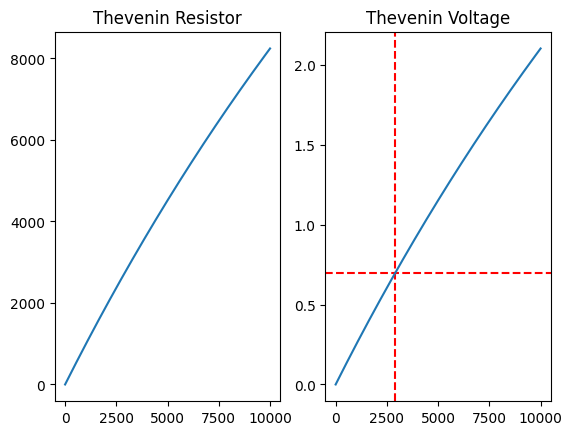

In [2]:
def Rt(R):
    return (47000*R)/(47000+R) 
def Vt(R):
    return 12 * (R)/(47000 + R)
def Vtsolve(R):
    return Vt(R) - 0.7
initial = -2
zero_solve = fsolve(Vtsolve,initial)

print(zero_solve)
R = np.linspace(0,10000,1000)
fig, ax = plt.subplots(1,2)
ax[0].set_title("Thevenin Resistor")
ax[0].plot(R,Rt(R))
ax[1].set_title("Thevenin Voltage")
ax[1].axvline(zero_solve,color="red",linestyle="--")
ax[1].axhline(0.7,color="red",linestyle="--")
ax[1].plot(R,Vt(R))

min_r = zero_solve

This variable resistor also modifies the Collector current due to the change in base current. As the beta value gets bigger, the term Rt/Beta tends to zero, so there is not much difference in the collector current.
It's important to notice that if the variable resistance causes a voltage lower than 0.7, the circuit would not work. After the next graph, all the resistance values will be in the valid zone

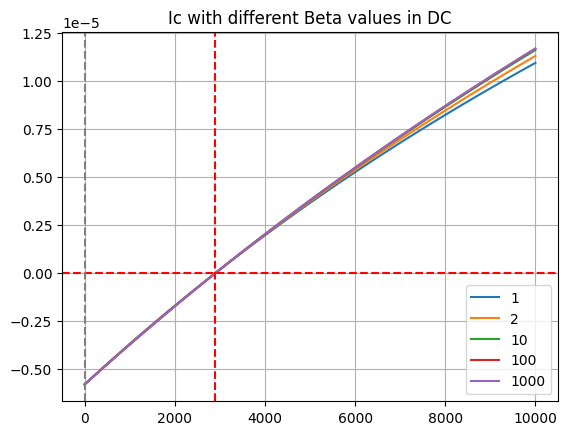

In [3]:
def Ic(R,Beta):
    return (Vt(R)-0.7)/( (Rt(R)/Beta) + 120000)
R = np.linspace(0,10000,1000)
plt.title("Ic with different Beta values in DC")
plt.plot(R,Ic(R,1), label="1")
plt.plot(R,Ic(R,2),label="2")
plt.plot(R,Ic(R,10),label = "10")
plt.plot(R,Ic(R,100),label="100")
plt.plot(R,Ic(R,1000),label="1000")
plt.axhline(y=0, color='red', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axvline(x=2900, color='red', linestyle='--')

plt.legend(loc="best")
plt.grid(True)

It is also noticeable how the difference is greater with higher resistance values; this is due to the weight of the beta value in the numerator in a derived Ic expression.

With all the information displayed here, we can get the hie value, which will be useful in the small signal analysis. The next graph is valid for the hie at room temperature VT=25[mv]

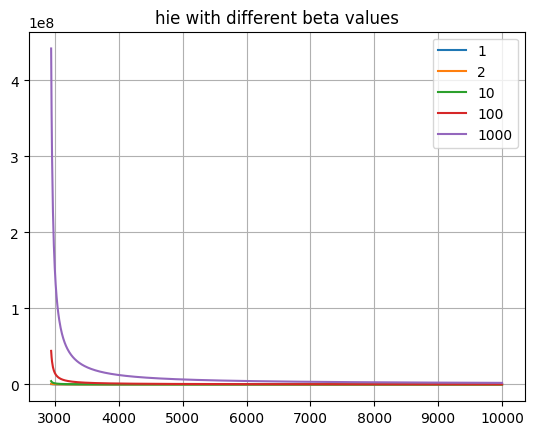

In [15]:
def hie(R,Beta):
    return 0.025*Beta/Ic(R,Beta)

R = np.linspace(min_r+30,10000,1000)

plt.title("hie with different beta values")
plt.plot(R,hie(R,1), label="1")
plt.plot(R,hie(R,2),label="2")
plt.plot(R,hie(R,10),label = "10")
plt.plot(R,hie(R,100),label="100")
plt.plot(R,hie(R,1000),label="1000")
plt.legend(loc="best")
plt.grid(True)

As we can see, hie converges to different values as the resistance increases

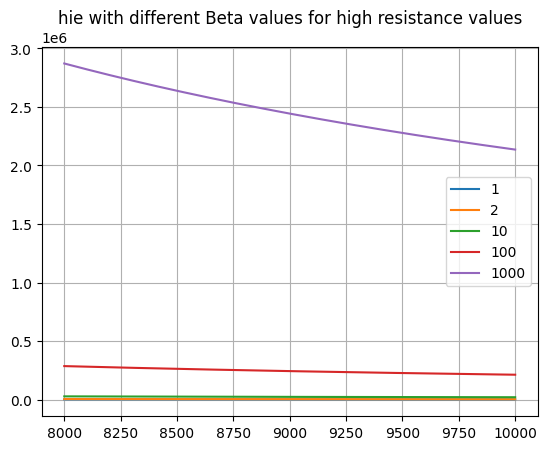

In [ ]:
R = np.linspace(8000,10000,1000)

plt.title("hie with different beta values for high resistance values")
plt.plot(R,hie(R,1), label="1")
plt.plot(R,hie(R,2),label="2")
plt.plot(R,hie(R,10),label = "10")
plt.plot(R,hie(R,100),label="100")
plt.plot(R,hie(R,1000),label="1000")
plt.legend(loc="best")
plt.grid(True)

In [ ]:
test